# Austin Weather Exercise Datacamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import text file into a dataframe
df = pd.read_csv('../data/NOAA_QCLCD_2011_hourly_13904.txt', header=None, sep=',')
print(df.shape)
df.head()

(10337, 44)


0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...          30.01      
2  13904  20110101  253  12  OVC060     10.00          ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00          ...          30.03      
4  13904  20110101  453  12  BKN070     10.00          ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]

### Add column labals and drop uneccessary columns

In [3]:
# column labels
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
column_list = column_labels.split(',')
df.columns = column_list
df.head()

Wban      date  Time  StationType sky_condition sky_conditionFlag  \
0  13904  20110101    53           12        OVC045                     
1  13904  20110101   153           12        OVC049                     
2  13904  20110101   253           12        OVC060                     
3  13904  20110101   353           12        OVC065                     
4  13904  20110101   453           12        BKN070                     

  visibility visibilityFlag wx_and_obst_to_vision wx_and_obst_to_visionFlag  \
0      10.00                                                                  
1      10.00                                                                  
2      10.00                                                                  
3      10.00                                                                  
4      10.00                                                                  

  ...  presschange presschangeFlag sea_level_pressure sea_level_pressureFlag  \
0 ...                                           29.95                          
1 ...                                           30.01                          
2 ...          030                              30.01                          
3 ...                                           30.03                          
4 ...                                           30.04                          

  record_type hourly_precip hourly_precipFlag altimeter altimeterFlag junk  
0          AA                                                   29.95       
1          AA                                                   30.02       
2          AA                                                   30.02       
3          AA                                                   30.04       
4          AA                                                   30.04       

[5 rows x 44 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 44 columns):
Wban                            10337 non-null int64
date                            10337 non-null int64
Time                            10337 non-null int64
StationType                     10337 non-null int64
sky_condition                   10337 non-null object
sky_conditionFlag               10337 non-null object
visibility                      10325 non-null object
visibilityFlag                  10337 non-null object
wx_and_obst_to_vision           10337 non-null object
wx_and_obst_to_visionFlag       10337 non-null object
dry_bulb_faren                  10337 non-null object
dry_bulb_farenFlag              10337 non-null object
dry_bulb_cel                    10337 non-null object
dry_bulb_celFlag                10337 non-null object
wet_bulb_faren                  10337 non-null object
wet_bulb_farenFlag              10337 non-null object
wet_bulb_cel                   

In [5]:
# drop columns of no interest
columns_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

df.drop(columns_to_drop, axis=1, inplace=True)
print(df.shape)
df.head().T

(10337, 17)


0         1         2         3         4
Wban                   13904     13904     13904     13904     13904
date                20110101  20110101  20110101  20110101  20110101
Time                      53       153       253       353       453
StationType               12        12        12        12        12
sky_condition         OVC045    OVC049    OVC060    OVC065    BKN070
visibility             10.00     10.00     10.00     10.00     10.00
dry_bulb_faren            51        51        51        50        50
dry_bulb_cel            10.6      10.6      10.6      10.0      10.0
wet_bulb_faren            38        37        37        38        37
wet_bulb_cel             3.1       3.0       2.9       3.1       2.8
dew_point_faren           15        14        13        17        15
dew_point_cel           -9.4     -10.0     -10.6      -8.3      -9.4
relative_humidity         24        23        22        27        25
wind_speed                15        10        15         7        11
wind_direction           360       340       010       350       020
station_pressure       29.42     29.49     29.49     29.51     29.51
sea_level_pressure     29.95     30.01     30.01     30.03     30.04

### Create datetime index

In [6]:
# convert 'date' to string
df['date'] = df.date.astype(str)

# Pad leading zeros to the Time column
df['Time'] = df.Time.apply(lambda x: '{:0>4}'.format(x))

# concatenate 'date and 'Time' strings
date_time = df.date + df.Time
print(date_time[:5])

0    201101010053
1    201101010153
2    201101010253
3    201101010353
4    201101010453
dtype: object


In [7]:
# convert the date_time string to a Pandas Series
date_times = pd.to_datetime(date_time, format='%Y%m%d%H%M')
date_times.head()

0   2011-01-01 00:53:00
1   2011-01-01 01:53:00
2   2011-01-01 02:53:00
3   2011-01-01 03:53:00
4   2011-01-01 04:53:00
dtype: datetime64[ns]

In [8]:
# set the index of the dataframe to the ne datetime series
df.set_index(date_times, inplace=True)
df.sample(10).T

2011-08-23 03:53:00 2011-03-11 03:53:00  \
Wban                             13904               13904   
date                          20110823            20110311   
Time                              0353                0353   
StationType                         12                  12   
sky_condition                      CLR                 CLR   
visibility                       10.00               10.00   
dry_bulb_faren                      78                  32   
dry_bulb_cel                      25.6                 0.0   
wet_bulb_faren                      75                  30   
wet_bulb_cel                      23.6                -1.0   
dew_point_faren                     73                  27   
dew_point_cel                     22.8                -2.8   
relative_humidity                   85                  82   
wind_speed                           5                   0   
wind_direction                     190                 000   
station_pressure                 29.41               29.71   
sea_level_pressure               29.89               30.26   

                   2011-12-27 01:53:00 2011-01-02 03:53:00  \
Wban                             13904               13904   
date                          20111227            20110102   
Time                              0153                0353   
StationType                         12                  12   
sky_condition                      CLR                 CLR   
visibility                       10.00               10.00   
dry_bulb_faren                      33                  27   
dry_bulb_cel                       0.6                -2.8   
wet_bulb_faren                      33                  25   
wet_bulb_cel                       0.3                -4.0   
dew_point_faren                     32                  20   
dew_point_cel                      0.0                -6.7   
relative_humidity                   96                  75   
wind_speed                           5                   8   
wind_direction                     260                 350   
station_pressure                 29.62               29.81   
sea_level_pressure               30.17               30.36   

                   2011-03-31 07:53:00 2011-06-09 10:53:00  \
Wban                             13904               13904   
date                          20110331            20110609   
Time                              0753                1053   
StationType                         12                  12   
sky_condition                   FEW200              SCT045   
visibility                        6.00               10.00   
dry_bulb_faren                      50                  88   
dry_bulb_cel                      10.0                31.1   
wet_bulb_faren                      47                  73   
wet_bulb_cel                       8.3                22.5   
dew_point_faren                     44                  65   
dew_point_cel                      6.7                18.3   
relative_humidity                   80                  47   
wind_speed                           6                  13   
wind_direction                     060                 170   
station_pressure                 29.36               29.42   
sea_level_pressure               29.89               29.91   

                   2011-10-23 18:53:00 2011-03-24 20:53:00  \
Wban                             13904               13904   
date                          20111023            20110324   
Time                              1853                2053   
StationType                         12                  12   
sky_condition                   SCT070              FEW200   
visibility                       10.00               10.00   
dry_bulb_faren                      73                  71   
dry_bulb_cel                      22.8                21.7   
wet_bulb_faren                      66                  64   
wet_bulb_cel                      18.9          

### Cleaning the Numeric Columns

We want to transform these columns such that they contain only numeric values and interpret missing data as `NaN`.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like 'M' to be interpreted as `NaN`.

In [9]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df.dry_bulb_faren.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00'])

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


In [10]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df['dry_bulb_faren'] = pd.to_numeric(df['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df.dry_bulb_faren.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [11]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')
df['dew_point_faren'] = pd.to_numeric(df['dew_point_faren'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.7+ MB


## Statistical Analysis

Now that you have the data read and cleaned, you can begin with statistical EDA. We'll analyze the `'dry_bulb_faren'` column and print the median temperatures for specific time ranges. We can do this using partial datetime string selection.

In [12]:
# Print the median of the dry_bulb_faren column
print(df.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [13]:
# ALTERNATIVELY
# Print the median of the dry_bulb_faren column
print(df.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df.dry_bulb_faren.loc['2011-Apr':'2011-Jun'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df.dry_bulb_faren.loc['2011-Jan'].median())

72.0
78.0
48.0


### Signal Variance

We're now going to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

We'll first resample `df` and `df_cliamte` by day and aggregate the mean temperatures. We will then extract the temperature related columns from each - `dry_bulb_faren` in `df`, and `Temperature` in `df_climate` - as NumPy arrays and compute the difference.

Notice that the indexes of `df` and `df_climate` are not aligned - `df` has dates in 2011, while `df_climate` has dates in 2010. This is why we extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas `.reset_index()` method to make sure the Series align properly. 

In [14]:
# load 2010 climate data
df_climate = pd.read_csv('../data/weather_data_austin_2010.csv', parse_dates=True, index_col='Date')
df_climate.head()

Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0

In [15]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [16]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056477


We want to find out how much hotter it is when the sun is shining on average? 

We can use a boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

In [17]:
# Using df, when is sky_condition 'CLR'?
is_sky_clear = df['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

Wban      date  Time  StationType sky_condition  \
2011-01-01  13904.0  20110101  2353         12.0           CLR   
2011-01-02  13904.0  20110102  2253         12.0           CLR   
2011-01-03  13904.0  20110103  0453         12.0           CLR   
2011-01-04      NaN       NaN   NaN          NaN           NaN   
2011-01-05  13904.0  20110105  2353         12.0           CLR   

            dry_bulb_faren dry_bulb_cel wet_bulb_faren wet_bulb_cel  \
2011-01-01            59.0          8.3             45          7.2   
2011-01-02            35.0          1.7             32          0.1   
2011-01-03            32.0          0.0             29         -1.9   
2011-01-04             NaN          NaN            NaN          NaN   
2011-01-05            35.0          1.7             33          0.3   

            dew_point_faren dew_point_cel relative_humidity  wind_speed  \
2011-01-01             28.0          -6.1                53        16.0   
2011-01-02             28.0          -7.2                76         8.0   
2011-01-03             26.0          -4.4                85         0.0   
2011-01-04              NaN           NaN               NaN         NaN   
2011-01-05             29.0          -1.7                79         0.0   

           wind_direction station_pressure sea_level_pressure  
2011-01-01            360            29.78              30.33  
2011-01-02            360            29.82              30.38  
2011-01-03            000            29.71              30.27  
2011-01-04            NaN              NaN                NaN  
2011-01-05            000            29.54              30.08

We want to find out when it was overcast.

In [18]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

Wban      date  Time  StationType  sky_condition  \
2011-01-01  13904.0  20110101  0353         12.0         OVC065   
2011-01-02      NaN       NaN   NaN          NaN            NaN   
2011-01-03  13904.0  20110103  2353         12.0  SCT042 OVC055   
2011-01-04  13904.0  20110104  2353         12.0  SCT010 OVC016   
2011-01-05  13904.0  20110105  0653         12.0  SCT006 OVC011   

            dry_bulb_faren dry_bulb_cel wet_bulb_faren wet_bulb_cel  \
2011-01-01            51.0         10.6             38          3.1   
2011-01-02             NaN          NaN            NaN          NaN   
2011-01-03            58.0          9.4             49          9.7   
2011-01-04            57.0          8.9             56          9.4   
2011-01-05            57.0         14.0             56         13.5   

            dew_point_faren dew_point_cel relative_humidity  wind_speed  \
2011-01-01             17.0          -9.4                27        15.0   
2011-01-02              NaN           NaN               NaN         NaN   
2011-01-03             45.0           7.0                79        10.0   
2011-01-04             56.0           8.9               100         8.0   
2011-01-05             56.0          13.3                96         3.0   

           wind_direction station_pressure sea_level_pressure  
2011-01-01            360            29.51              30.03  
2011-01-02            NaN              NaN                NaN  
2011-01-03            200            29.70                  M  
2011-01-04            VR             29.59                  M  
2011-01-05            250            29.48                  M

In [19]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.

### Visualize the data

Let's see if there is a correlation between temperature and visability?

We'll plot the weekly average temperature and visibility as subplots. To do this, we'll need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the **Pearson correlation coefficient** using `.corr()`. The **Pearson correlation coefficient**, known also as Pearson's r, ranges from **-1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation)**. A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

`visibility` needs to be converted to a numeric prior to plotting

In [27]:
df['visibility'] = pd.to_numeric(df.visibility, errors='coerce')
df.dtypes

Wban                    int64
date                   object
Time                   object
StationType             int64
sky_condition          object
visibility            float64
dry_bulb_faren        float64
dry_bulb_cel           object
wet_bulb_faren         object
wet_bulb_cel           object
dew_point_faren       float64
dew_point_cel          object
relative_humidity      object
wind_speed            float64
wind_direction         object
station_pressure       object
sea_level_pressure     object
dtype: object

In [31]:
import matplotlib.pyplot as plt

# Select the 'visibility' and 'dry_bulb_faren' columns and resample them by week, 
# aggregating the mean. Assign the result to weekly_mean.
weekly_mean = df[['visibility', 'dry_bulb_faren']].resample('W').mean()
print(weekly_mean.shape)
weekly_mean[:5]

(53, 2)


visibility  dry_bulb_faren
2011-01-02   10.000000       44.791667
2011-01-09    8.275785       50.246637
2011-01-16    6.451651       41.103774
2011-01-23    8.370853       47.194313
2011-01-30    9.966851       53.486188

In [32]:
# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


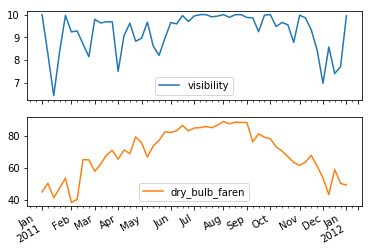

In [33]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

We previously analyzed the `sky_condition` column to explore the difference in temperature on sunny days compared to overcast days. Recall that a `sky_condition` of `CLR` represents a sunny day. This time we'll explore sunny days in greater detail. Specifically, we will use a box plot to visualize the fraction of days that are sunny.

The `sky_condition` column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

In [34]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

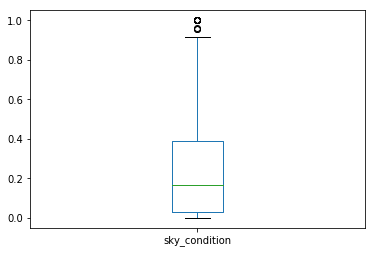

In [35]:
# Calculate the number of measured sunny hours per day as 
# the sum of resampled, assigning to sunny_hours.
sunny_hours = resampled.sum()

# Calculate the total number of measured hours per day as the 
# count of resampled, assigning to total_hours
total_hours = resampled.count()

# Calculate the fraction of hours per day that were 
# sunny as the ratio of sunny hours to total hours.
sunny_fraction = sunny_hours / total_hours

# Draw a box plot of sunny_fraction using .plot() with kind set to `'box'``.
sunny_fraction.plot(kind='box')
plt.show()

Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

We will explore the maximum temperature and dew point of each month. The columns of interest are `dew_point_faren` and `dry_bulb_faren`. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month!

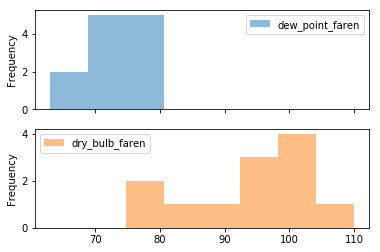

In [36]:
# Select the 'dew_point_faren' and 'dry_bulb_faren' columns (in that order). 
# Resample by month and aggregate the maximum monthly temperatures.
monthly_max = df[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Plot a histogram of the resampled data with bins=8, alpha=0.5, and subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)
plt.show()

We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, we'll use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value.

We'll want to select the maximum temperature in August in `df_climate`, and then maximum daily temperatures in August 2011. We will then filter out the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

Once we've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

In [42]:
# From df_climate, extract the maximum temperature observed in August 2010.
august_max = df_climate.Temperature.loc['2010-Aug'].max()
print(august_max)

# select the August 2011 temperature data from the 'dry_bulb_faren'. Resample this 
# data by day and aggregate the maximum value. Store the result in august_2011.
august_2011 = df.dry_bulb_faren.loc['2011-Aug'].resample('D').max()
print(august_2011.shape)
print(august_2011)

95.3
(31,)
2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-25     93.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Freq: D, Name: dry_bulb_faren, dtype: float64


In [41]:
# Filter rows of august_2011 to keep days where the value exceeded august_max.
august_2011_high = august_2011[august_2011 > august_max]
print(august_2011_high.shape)
print(august_2011_high)

(30,)
2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Name: dry_bulb_faren, dtype: float64


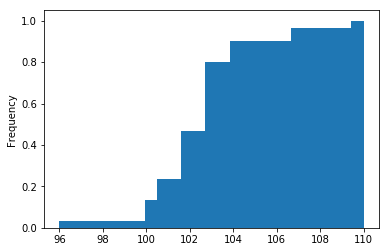

In [44]:
# Construct a CDF of august_2011_high using 25 bins. Remember to specify the kind, 
# normed, and cumulative parameters in addition to bins.
august_2011_high.plot(kind='hist', bins=25, normed=True, cumulative=True)
plt.show();